In [1]:
import pandas
import seaborn
seaborn.set_style("whitegrid")

df = pandas.read_csv("../data/mineral-split.csv").set_index("ID")
df.head()

,index,sample.ID,split,fold
ID,,,,
100,4,100,test,-1
1000,5,1000,calibration,2
10000,6,10000,test,-1
10001,7,10001,calibration,2
10002,8,10002,calibration,1


In [2]:
from reader_Rdata import read_Rdata

config = pandas.read_json("../config.json", typ="series")
df_properties, df_spc = read_Rdata(config.LUCAS_RDATA)

df = df.merge(df_properties, left_index=True, right_index=True)
df.set_index("split").loc["calibration"].describe()

,index,fold,clay,silt,sand,pH.in.H2O,OC,N,P,K,CEC,CaCO3
count,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,9858.013046,2.999833,18.979177,38.175197,42.843285,6.304841,29.256222,2.151564,29.792683,192.954608,14.238920,53.399482
std,5825.355639,1.414273,13.079922,18.211754,26.061081,1.303839,28.702704,1.611384,32.776578,234.089028,10.684177,126.869782
min,5.000000,1.000000,0.000000,0.000000,1.000000,3.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.000000,2.000000,8.000000,25.000000,20.000000,5.190000,12.400000,1.200000,10.800000,68.600000,6.800000,0.000000
50%,9875.000000,3.000000,17.000000,38.000000,42.000000,6.330000,19.700000,1.700000,22.200000,132.200000,11.700000,1.000000
75%,14906.500000,4.000000,27.000000,51.000000,64.000000,7.520000,34.500000,2.600000,42.700000,241.575000,18.900000,15.000000
max,19961.000000,5.000000,79.000000,92.000000,99.000000,10.080000,198.100000,14.900000,1366.400000,7342.000000,137.000000,909.000000


In [3]:
df.set_index("split").loc["test"].describe()

,index,fold,clay,silt,sand,pH.in.H2O,OC,N,P,K,CEC,CaCO3
count,5979.000000,5979.0,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000,5979.000000
mean,9837.212243,-1.0,18.698612,38.331494,42.955845,6.303511,29.540291,2.153103,29.116173,188.062151,13.971283,56.953504
std,5824.043438,0.0,12.852008,18.477627,26.200932,1.322633,29.154519,1.617100,32.499928,218.237332,10.260117,131.407432
min,4.000000,-1.0,0.000000,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4745.500000,-1.0,8.000000,25.000000,19.000000,5.160000,12.150000,1.200000,10.500000,70.100000,6.800000,0.000000
50%,9861.000000,-1.0,17.000000,37.000000,42.000000,6.360000,19.500000,1.700000,21.000000,131.400000,11.700000,1.000000
75%,14881.500000,-1.0,26.000000,51.000000,64.000000,7.550000,35.000000,2.600000,41.850000,235.500000,18.400000,19.000000
max,19960.000000,-1.0,75.000000,92.000000,99.000000,9.750000,199.200000,16.200000,789.800000,6861.000000,98.700000,944.000000


In [4]:
sdf = df.melt(id_vars=["index", "split"], value_vars=["clay", "silt", "sand", "OC", "pH.in.H2O", "N", "P", "K", "CEC", "CaCO3"])
sdf.head()

,index,split,variable,value
0,4,test,clay,7.0
1,5,calibration,clay,13.0
2,6,test,clay,40.0
3,7,calibration,clay,26.0
4,8,calibration,clay,22.0


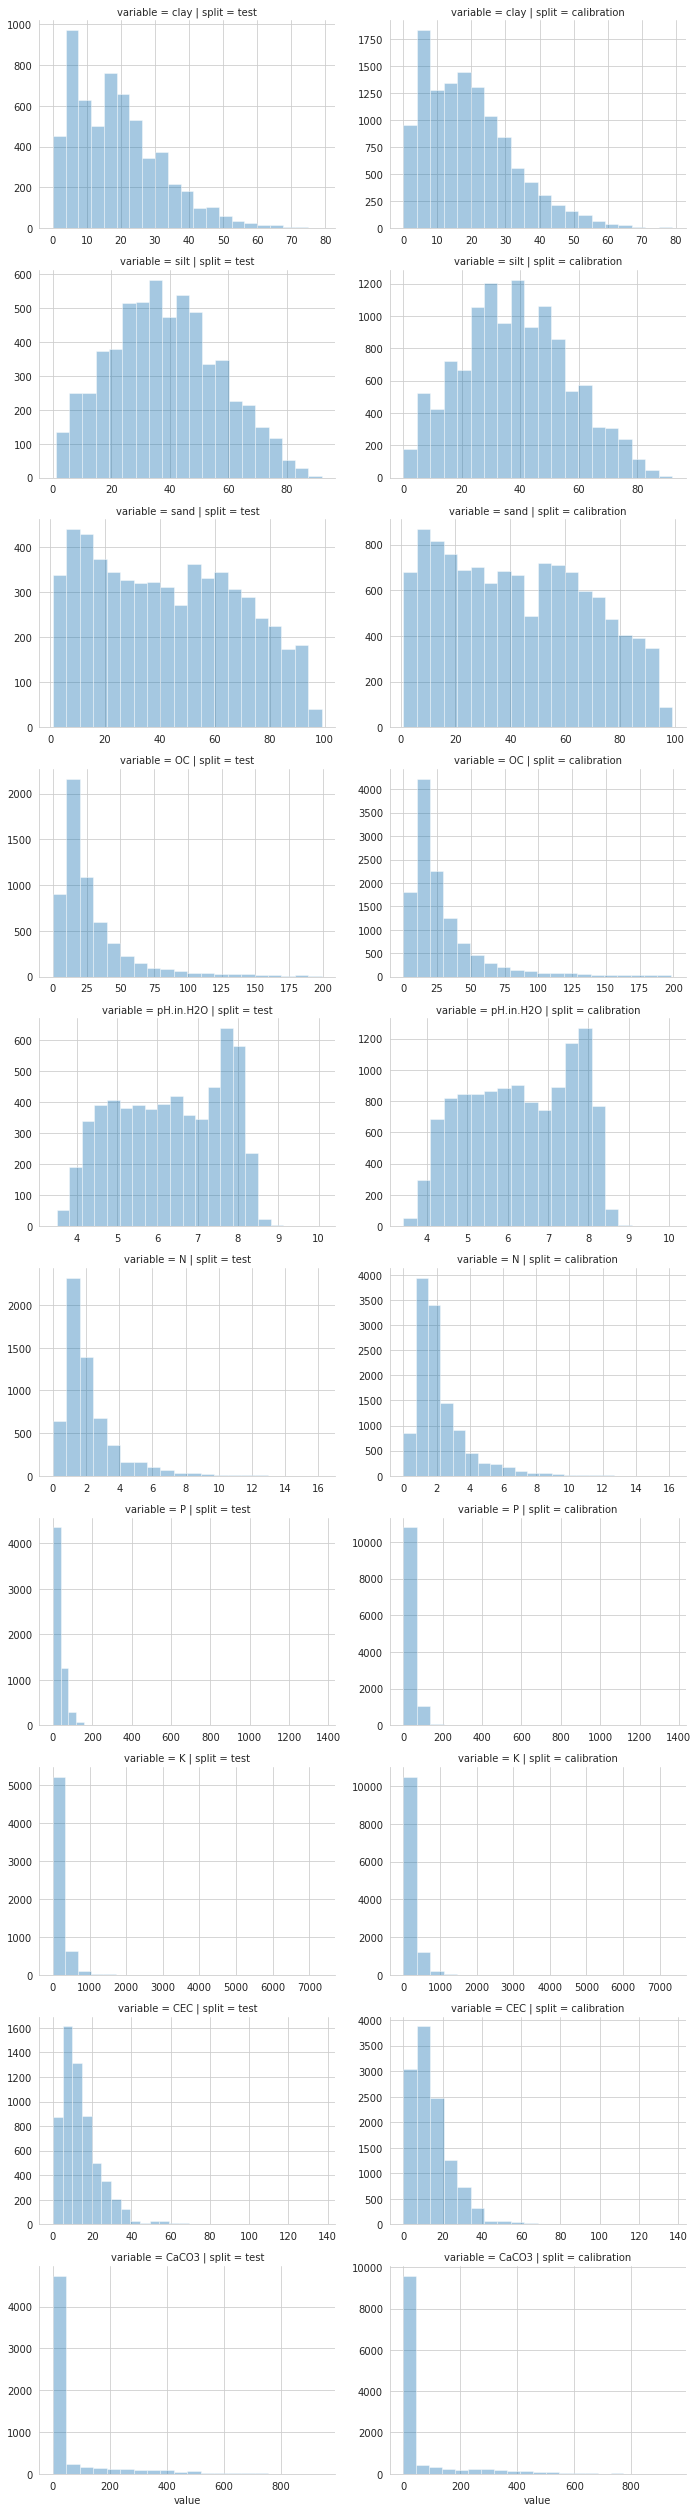

In [5]:
g = seaborn.FacetGrid(
    sdf, col="split", row='variable', sharex='row', sharey=False, height=3.5, aspect=1.4)
g.map(seaborn.distplot, "value", hist=True, kde=False, hist_kws={"edgecolor": 'white'}, bins=20)